# Predição de Evasão Escolar - VixData Meetup

* Date: 09/03/2017
* Author: [Fabricio Vargas Matos](https://www.linkedin.com/in/fabriciovargasmatos)
* Email: fabriciovargasmatos@gmail.com

## Objetivo

Construir um classificador que possa, utilizando dados disponíveis após o término do primeiro período letivo (semestre ou ano) prever se o aluno irá evadir ou não.


## Requisitos

* python 2.7+
* jupyter notebook - ambiente web iterativo para programar e documentar os resultados.
* pandas - manipulação de datasets
* numpy - arrays e algebra linear
* matplotlib - renderizar gráficos
* scikit-learn - diversos algoritmos de machine-learning e ferramentas de apoio


In [1]:
%matplotlib inline

#import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from pandas.tools.plotting import scatter_matrix
from pandas import DataFrame
from sklearn import cross_validation
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

/Users/fabriciomatos/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 1. Análise Exploratória

In [2]:
df = pd.read_csv('../../../input/alunos.csv', header=0, sep=';')
df.dtypes

hash_cod_matricula                  object
cod_instituicao                      int64
cod_curso                            int64
ano_letivo_ini                       int64
periodo_letivo_ini                   int64
cor                                float64
distancia_conclusao_2grau            int64
cod_escola_2_grau                  float64
renda_per_capita                     int64
grau_instrucao                     float64
estado_civil                       float64
cod_cidade                         float64
possui_filhos                        int64
sexo                                 int64
ano_nascimento                       int64
cod_naturalidade                   float64
ano_reservista                     float64
forma_ingresso                     float64
turno                              float64
reprovacoes_por_nota_periodo_1       int64
reprovacoes_por_falta_periodo_1      int64
aprovacoes_periodo_1                 int64
aproveitamentos_periodo_1            int64
evadiu     

In [3]:
df.head(10)

,hash_cod_matricula,cod_instituicao,cod_curso,ano_letivo_ini,periodo_letivo_ini,cor,distancia_conclusao_2grau,cod_escola_2_grau,renda_per_capita,grau_instrucao,...,ano_nascimento,cod_naturalidade,ano_reservista,forma_ingresso,turno,reprovacoes_por_nota_periodo_1,reprovacoes_por_falta_periodo_1,aprovacoes_periodo_1,aproveitamentos_periodo_1,evadiu
0,0x0A9242EA94CE1155D02BBACC8B8A893CEE7307DB,1,5,2009,1,0.25,6,NaN,5,0.2,...,1981,NaN,2002.0,0.3,0.50,2,5,0,0,1
1,0x0D57BAB7348F0491451ED795565DA2DE76D63162,1,5,2009,1,0.25,0,NaN,6,0.0,...,1990,5664.0,NaN,0.3,0.50,2,6,0,0,1
2,0x0D590B5FE598BD5DCFE31441FEEE1916990C26B8,1,5,2009,1,0.25,1,2192.0,4,0.2,...,1991,878.0,NaN,0.3,0.75,0,0,8,0,0
3,0x11EC39F0616A18C6494E8D59DE5FB9F7B7EFB90D,1,5,2009,1,0.85,1,5407.0,5,0.2,...,1991,877.0,NaN,0.3,0.75,1,0,7,0,0
4,0x164A90A658F0E53E3FC33DA353CC347B20579329,1,5,2009,1,0.25,1,3411.0,0,0.2,...,1990,1960.0,NaN,0.3,0.75,3,0,5,0,0
5,0x18B9E06991AF3670DA287EB4A9E691156E77D348,1,5,2009,1,0.85,2,NaN,3,0.2,...,1991,878.0,NaN,0.3,0.50,0,0,0,0,1
6,0x1CA38CE4DC39EA19ED40B482520A3E2621D2E07D,1,5,2009,1,0.85,2,183.0,4,0.2,...,1990,877.0,NaN,0.3,0.75,0,0,8,0,0
7,0x23F4A1ACEED6A1D4D41430B27FDFAC6E435360B5,1,5,2009,1,0.70,2,NaN,3,0.2,...,1988,878.0,2006.0,0.3,0.50,0,0,0,0,1
8,0x25D1C8E5F61F550CB8017E472E8DB6CAB9052373,1,5,2009,1,0.10,1,92.0,7,0.2,...,1991,878.0,NaN,0.3,0.75,0,1,7,0,0
9,0x2669B5FC52197E56965AC18E0E265DC6DC773E5C,1,5,2009,1,0.25,1,463.0,1,0.2,...,1990,878.0,2008.0,0.3,0.50,0,0,0,0,1


In [4]:
#numero de nulls em cada coluna
df.isnull().sum()

hash_cod_matricula                     0
cod_instituicao                        0
cod_curso                              0
ano_letivo_ini                         0
periodo_letivo_ini                     0
cor                                    0
distancia_conclusao_2grau              0
cod_escola_2_grau                  26032
renda_per_capita                       0
grau_instrucao                         0
estado_civil                           0
cod_cidade                          2057
possui_filhos                          0
sexo                                   0
ano_nascimento                         0
cod_naturalidade                    2402
ano_reservista                     38740
forma_ingresso                         0
turno                                  0
reprovacoes_por_nota_periodo_1         0
reprovacoes_por_falta_periodo_1        0
aprovacoes_periodo_1                   0
aproveitamentos_periodo_1              0
evadiu                                 0
dtype: int64

In [5]:
df.fillna(value=0, inplace=True)
df.isnull().sum()

hash_cod_matricula                 0
cod_instituicao                    0
cod_curso                          0
ano_letivo_ini                     0
periodo_letivo_ini                 0
cor                                0
distancia_conclusao_2grau          0
cod_escola_2_grau                  0
renda_per_capita                   0
grau_instrucao                     0
estado_civil                       0
cod_cidade                         0
possui_filhos                      0
sexo                               0
ano_nascimento                     0
cod_naturalidade                   0
ano_reservista                     0
forma_ingresso                     0
turno                              0
reprovacoes_por_nota_periodo_1     0
reprovacoes_por_falta_periodo_1    0
aprovacoes_periodo_1               0
aproveitamentos_periodo_1          0
evadiu                             0
dtype: int64

In [6]:
df.groupby('evadiu').size()

evadiu
0    34885
1    19295
dtype: int64

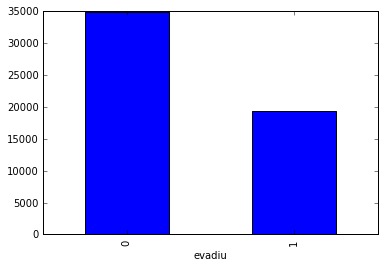

In [7]:
df.groupby('evadiu').size().plot(kind='bar')
plt.show()

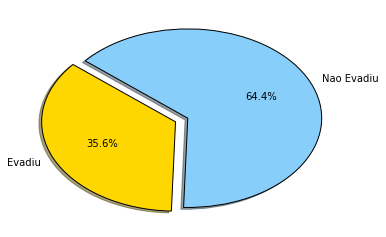

In [8]:
def pizza_evazao(qtd_evadiu, qtd_nao_evadiu):
    labels = 'Evadiu', 'Nao Evadiu'
    sizes = [qtd_evadiu, qtd_nao_evadiu]
    colors = ['gold','lightskyblue']
    explode = (0.1, 0)  # explode 1st slice

    # Plot
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
    plt.show()
    
qtd_evadiu = df.groupby('evadiu').size()[1]
qtd_nao_evadiu = df.groupby('evadiu').size()[0]

pizza_evazao(qtd_evadiu, qtd_nao_evadiu)

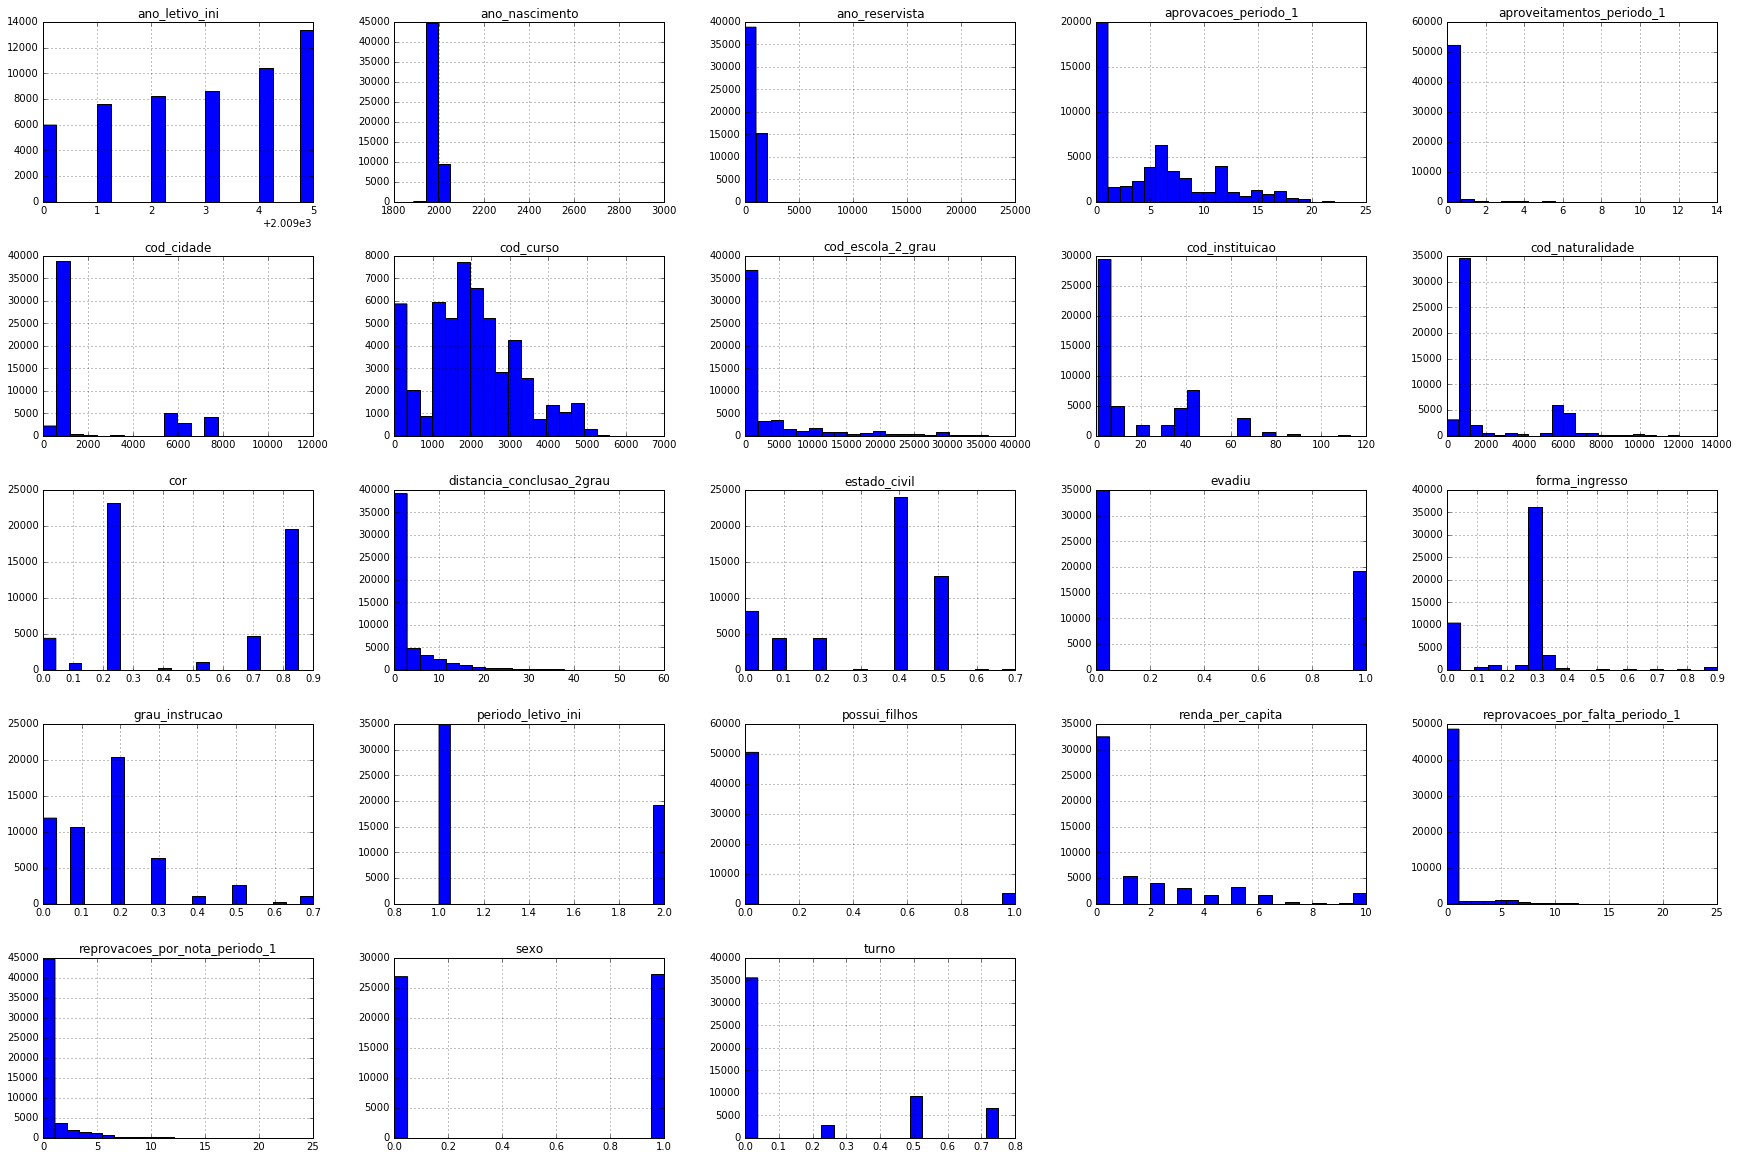

In [27]:
df.hist(figsize=(30, 20), bins=20)
plt.show()

In [10]:
df.describe()

,cod_instituicao,cod_curso,ano_letivo_ini,periodo_letivo_ini,cor,distancia_conclusao_2grau,cod_escola_2_grau,renda_per_capita,grau_instrucao,estado_civil,...,ano_nascimento,cod_naturalidade,ano_reservista,forma_ingresso,turno,reprovacoes_por_nota_periodo_1,reprovacoes_por_falta_periodo_1,aprovacoes_periodo_1,aproveitamentos_periodo_1,evadiu
count,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,...,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000
mean,18.176855,2033.591067,2011.921761,1.354670,0.489345,2.950295,3755.274271,1.503894,0.177054,0.324566,...,1987.258324,2167.530306,577.943946,0.252095,0.189816,0.788040,0.561480,5.224068,0.104633,0.356128
std,21.694508,1176.803031,1.696740,0.478418,0.312309,5.628073,7116.327990,2.521047,0.147465,0.177241,...,10.924022,2357.702863,998.890314,0.147253,0.280422,1.712982,1.693271,5.189841,0.672926,0.478858
min,1.000000,5.000000,2009.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1887.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1255.000000,2010.000000,1.000000,0.250000,0.000000,0.000000,0.000000,0.100000,0.200000,...,1982.000000,820.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,1927.000000,2012.000000,1.000000,0.250000,0.000000,71.000000,0.000000,0.200000,0.400000,...,1991.000000,877.000000,0.000000,0.300000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
75%,40.000000,2770.000000,2013.000000,2.000000,0.850000,3.000000,4102.000000,2.000000,0.200000,0.400000,...,1995.000000,3565.000000,1995.000000,0.300000,0.500000,1.000000,0.000000,8.000000,0.000000,1.000000
max,113.000000,6559.000000,2014.000000,2.000000,0.850000,58.000000,37807.000000,10.000000,0.700000,0.700000,...,2971.000000,12040.000000,20190.000000,0.900000,0.750000,22.000000,22.000000,22.000000,14.000000,1.000000


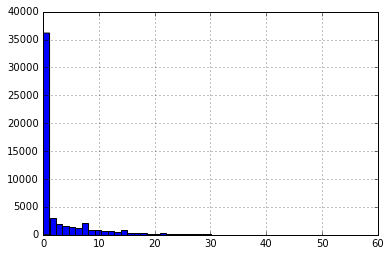

In [11]:
df['distancia_conclusao_2grau'].hist(bins=50)
plt.show()

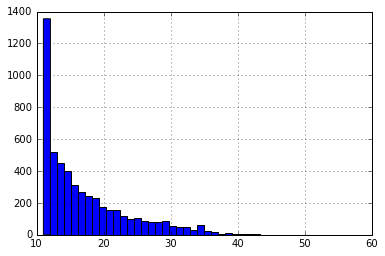

In [12]:
df_temp = df[df['distancia_conclusao_2grau'] > 10]
df_temp['distancia_conclusao_2grau'].hist(bins=45)
plt.show()

In [13]:
df.groupby('evadiu').describe()

ano_letivo_ini  ano_nascimento  ano_reservista  \
evadiu                                                         
0      count    34885.000000    34885.000000    34885.000000   
       mean      2012.045636     1987.838125      489.339114   
       std          1.710126       10.355903      925.081534   
       min       2009.000000     1887.000000        0.000000   
       25%       2011.000000     1983.000000        0.000000   
       50%       2012.000000     1992.000000        0.000000   
       75%       2014.000000     1995.000000        0.000000   
       max       2014.000000     2054.000000    20190.000000   
1      count    19295.000000    19295.000000    19295.000000   
       mean      2011.697797     1986.210054      738.139829   
       std          1.648852       11.810667     1102.145557   
       min       2009.000000     1900.000000        0.000000   
       25%       2010.000000     1981.000000        0.000000   
       50%       2012.000000     1989.000000        0.000000   
       75%       2013.000000     1993.000000     2002.000000   
       max       2014.000000     2971.000000    20085.000000   

              aprovacoes_periodo_1  aproveitamentos_periodo_1    cod_cidade  \
evadiu                                                                        
0      count          34885.000000               34885.000000  34885.000000   
       mean               6.906435                   0.097520   2191.351784   
       std                5.250645                   0.635860   2487.931442   
       min                0.000000                   0.000000      0.000000   
       25%                3.000000                   0.000000    820.000000   
       50%                6.000000                   0.000000    870.000000   
       75%               11.000000                   0.000000   1683.000000   
       max               22.000000                  12.000000  11927.000000   
1      count          19295.000000               19295.000000  19295.000000   
       mean               2.182379                   0.117492   2038.203732   
       std                3.379086                   0.735054   2383.340278   
       min                0.000000                   0.000000      0.000000   
       25%                0.000000                   0.000000    820.000000   
       50%                0.000000                   0.000000    870.000000   
       75%                4.000000                   0.000000    878.000000   
       max               21.000000                  14.000000  11678.000000   

                 cod_curso  cod_escola_2_grau  cod_instituicao  \
evadiu                                                           
0      count  34885.000000       34885.000000     34885.000000   
       mean    2196.702136        3491.907066        21.213702   
       std     1184.003050        7147.403799        22.848236   
       min        5.000000           0.000000         1.000000   
       25%     1386.000000           0.000000         2.000000   
       50%     2057.000000           0.000000         8.000000   
       75%     3033.000000        2961.000000        41.000000   
       max     6559.000000       37616.000000       113.000000   
1      count  19295.000000       19295.000000     19295.000000   
       mean    1738.689298        4231.437264        12.686292   
       std     1104.141680        7034.996426        18.191719   
       min        5.000000           0.000000         1.000000   
       25%     1003.000000           0.000000         2.000000   
       50%     1837.000000         885.000000         4.000000   
       75%     2466.000000        4922.000000         9.000000   
       max     5199.000000       37807.000000       113.000000   

              cod_naturalidade      ...       estado_civil  forma_ingresso  \
evadiu                              ...                                      
0      count      34885.000000      ...       34885.000000    34885.000000   
       mean    

## 2. Preparação dos dados para o treino

In [14]:
df.drop('hash_cod_matricula', axis=1, inplace=True)
df.head(10)

,cod_instituicao,cod_curso,ano_letivo_ini,periodo_letivo_ini,cor,distancia_conclusao_2grau,cod_escola_2_grau,renda_per_capita,grau_instrucao,estado_civil,...,ano_nascimento,cod_naturalidade,ano_reservista,forma_ingresso,turno,reprovacoes_por_nota_periodo_1,reprovacoes_por_falta_periodo_1,aprovacoes_periodo_1,aproveitamentos_periodo_1,evadiu
0,1,5,2009,1,0.25,6,0.0,5,0.2,0.4,...,1981,0.0,2002.0,0.3,0.50,2,5,0,0,1
1,1,5,2009,1,0.25,0,0.0,6,0.0,0.4,...,1990,5664.0,0.0,0.3,0.50,2,6,0,0,1
2,1,5,2009,1,0.25,1,2192.0,4,0.2,0.4,...,1991,878.0,0.0,0.3,0.75,0,0,8,0,0
3,1,5,2009,1,0.85,1,5407.0,5,0.2,0.4,...,1991,877.0,0.0,0.3,0.75,1,0,7,0,0
4,1,5,2009,1,0.25,1,3411.0,0,0.2,0.4,...,1990,1960.0,0.0,0.3,0.75,3,0,5,0,0
5,1,5,2009,1,0.85,2,0.0,3,0.2,0.4,...,1991,878.0,0.0,0.3,0.50,0,0,0,0,1
6,1,5,2009,1,0.85,2,183.0,4,0.2,0.4,...,1990,877.0,0.0,0.3,0.75,0,0,8,0,0
7,1,5,2009,1,0.70,2,0.0,3,0.2,0.4,...,1988,878.0,2006.0,0.3,0.50,0,0,0,0,1
8,1,5,2009,1,0.10,1,92.0,7,0.2,0.4,...,1991,878.0,0.0,0.3,0.75,0,1,7,0,0
9,1,5,2009,1,0.25,1,463.0,1,0.2,0.4,...,1990,878.0,2008.0,0.3,0.50,0,0,0,0,1


In [15]:
ncolumns = df.shape[1]
array = df.values
    
X = array[:,0:ncolumns-1].astype(float)
Y = array[:,ncolumns-1]

X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y, test_size=0.20, random_state=7)

In [16]:
print 'X_train/Y_train:'
print X_train.shape
print Y_train.shape
print 
print 'X_validation/Y_validation:'
print X_validation.shape
print Y_validation.shape

X_train/Y_train:
(43344, 22)
(43344,)

X_validation/Y_validation:
(10836, 22)
(10836,)


## 3. Dummy Classifier

In [17]:
def trainDummyClassifier(X_train, Y_train):
    print '\nTraining ...'

    # “stratified”: generates predictions by respecting the training set’s class distribution.
    # “uniform”: generates predictions uniformly at random.
    model = DummyClassifier(strategy='stratified', random_state=7)
    
    #train
    model.fit(X_train, Y_train)
    
    return model

trainedDummyModel = trainDummyClassifier(X_train, Y_train)
print 'Done!'


Training ...
Done!


In [18]:
predictions = trainedDummyModel.predict(X_validation)

print 'X_validatinon:', len(X_validation)
print 'predictions:', len(predictions)
print predictions

X_validatinon: 10836
predictions: 10836
[ 0.  1.  0. ...,  0.  1.  1.]


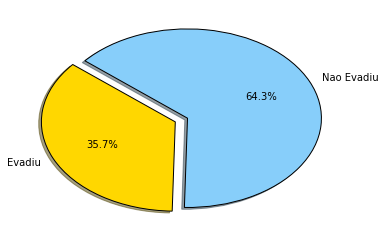

In [19]:
qtd_evadiu = len(np.where(predictions == 1)[0])
qtd_nao_evadiu = len(np.where(predictions == 0)[0])

pizza_evazao(qtd_evadiu, qtd_nao_evadiu)

In [20]:
def test_accuracy(predictions, X_validation, Y_validation):    
    print '\n=== Model Accuracy ==='

    print '\naccuracy_score:'
    print(accuracy_score(Y_validation, predictions))
    
    print '\nconfusion_matrix:'
    print '=> By definition a confusion matrix C is such that C_{i, j} is equal to the number of observations known to be in group i but predicted to be in group j.'
    print(confusion_matrix(Y_validation, predictions))
    
    print '\nclassification_report:'
    print '=> http://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/'
    print(classification_report(Y_validation, predictions))

    
test_accuracy(predictions, X_validation, Y_validation)    


=== Model Accuracy ===

accuracy_score:
0.539774824659

confusion_matrix:
=> By definition a confusion matrix C is such that C_{i, j} is equal to the number of observations known to be in group i but predicted to be in group j.
[[4481 2505]
 [2482 1368]]

classification_report:
=> http://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/
             precision    recall  f1-score   support

        0.0       0.64      0.64      0.64      6986
        1.0       0.35      0.36      0.35      3850

avg / total       0.54      0.54      0.54     10836



## 4. Random Forest

Mas o que é RandomForest? Pausa para um breve [overview de Random Forest](random-forest.pdf)

### References:

* Decision trees - https://www.youtube.com/watch?v=-dCtJjlEEgM
* Random Forests - https://www.youtube.com/watch?v=3kYujfDgmNk
* Random Forests Applications - https://www.youtube.com/watch?v=zFGPjRPwyFw

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [21]:
def trainRandomForestClassifier(X_train, Y_train):
    print '\nTraining ...'
    
    model = RandomForestClassifier(max_features='log2', n_estimators=500, random_state=7, class_weight='balanced')
    
    #train
    model.fit(X_train, Y_train)
    
    return model

trainedRFModel = trainRandomForestClassifier(X_train, Y_train)
print 'Done!'


Training ...
Done!


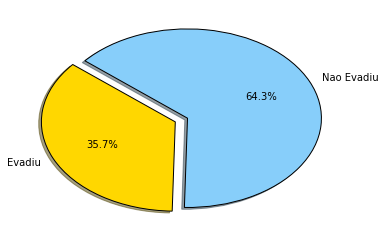

In [22]:
qtd_evadiu = len(np.where(predictions == 1)[0])
qtd_nao_evadiu = len(np.where(predictions == 0)[0])

pizza_evazao(qtd_evadiu, qtd_nao_evadiu)

In [23]:
predictions = trainedRFModel.predict(X_validation)
test_accuracy(predictions, X_validation, Y_validation)    


=== Model Accuracy ===

accuracy_score:
0.871816168328

confusion_matrix:
=> By definition a confusion matrix C is such that C_{i, j} is equal to the number of observations known to be in group i but predicted to be in group j.
[[6559  427]
 [ 962 2888]]

classification_report:
=> http://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/
             precision    recall  f1-score   support

        0.0       0.87      0.94      0.90      6986
        1.0       0.87      0.75      0.81      3850

avg / total       0.87      0.87      0.87     10836



## 5. Visualização dos dados em 2D

In [24]:
# http://scikit-learn.org/stable/auto_examples/plot_multilabel.html#sphx-glr-auto-examples-plot-multilabel-py
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


def plot_subfigure(X, Y, subplot, title, transform):
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError

    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel='linear'))
    classif.fit(X, Y)

    plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    plt.scatter(X[:, 0], X[:, 1], s=40, c='gray')
    plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
               facecolors='none', linewidths=2, label='Class 1')
    plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
               facecolors='none', linewidths=2, label='Class 2')

    plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
                    'Boundary\nfor class 1')
    plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
                    'Boundary\nfor class 2')
    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
    plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
    if subplot == 2:
        plt.xlabel('First principal component')
        plt.ylabel('Second principal component')
        plt.legend(loc="upper left")

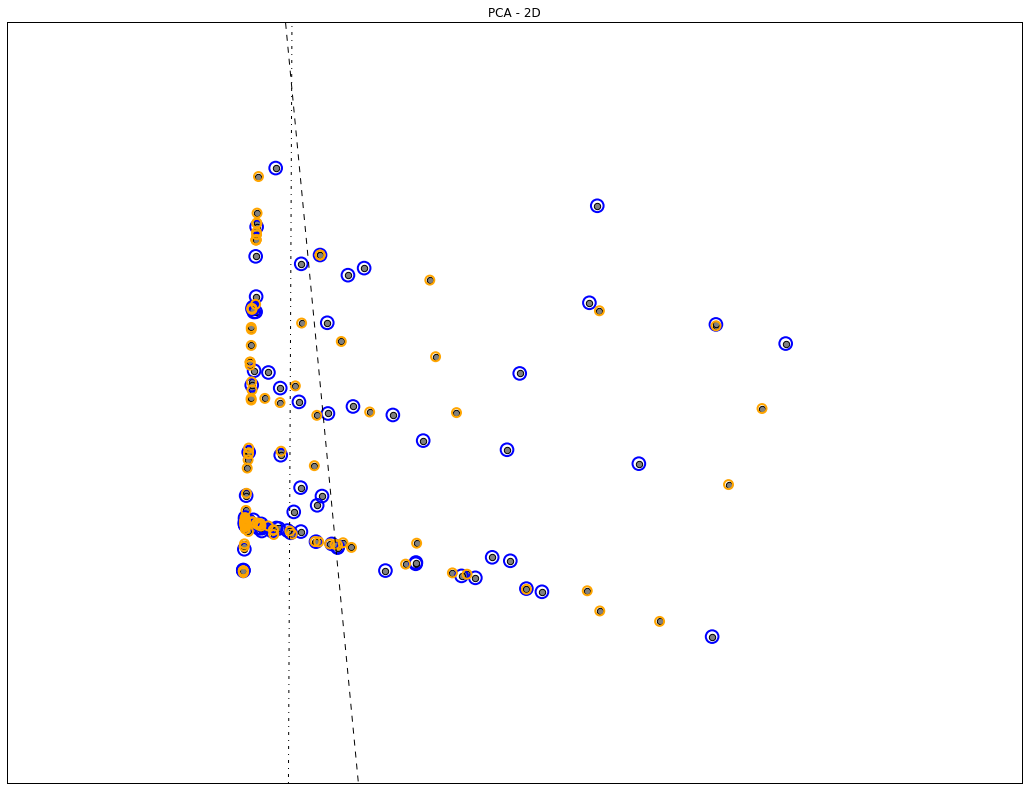

In [25]:
x = X_validation

y0 = Y_validation
y1 = 1 - Y_validation
y = np.column_stack((y0.reshape(len(y0), 1), y1.reshape(len(y1), 1)))

plt.figure(figsize=(40, 30))

data_samples = 200
plot_subfigure(x[:data_samples], y[:data_samples], 4, "PCA - 2D", "pca")

plt.show()

## 6. Tunando os parametros do RF


In [26]:
n_estimators_values = [50, 200]
max_features_values = [1, 0.1, 'log2']
param_grid = dict(n_estimators=n_estimators_values, max_features=max_features_values)

results = []

model = RandomForestClassifier(verbose=0)

# validação cruzada é um mecanismo muito importante para manter o modelo genérico o suficiente para
# gerar boas predições em datasets desconhecidos.
kfold = cross_validation.KFold(n=len(X_train), n_folds=10, random_state=7)
grid = GridSearchCV(n_jobs=5, estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)

grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))    

cv_results = grid_result.cv_results_['mean_test_score']
results.append(cv_results)

grid_scores = sorted(grid_result.grid_scores_, key=lambda x: x[2].mean(), reverse=True)
for param, mean_score, scores in grid_scores:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), param))


Best: 0.871332 using {'max_features': 'log2', 'n_estimators': 200}
0.871332 (0.001133) with: {'max_features': 'log2', 'n_estimators': 200}
0.869486 (0.004089) with: {'max_features': 'log2', 'n_estimators': 50}
0.867386 (0.003991) with: {'max_features': 0.1, 'n_estimators': 200}
0.864433 (0.003001) with: {'max_features': 0.1, 'n_estimators': 50}
0.860142 (0.004237) with: {'max_features': 1, 'n_estimators': 200}
0.856497 (0.004472) with: {'max_features': 1, 'n_estimators': 50}


/Users/fabriciomatos/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:662: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
